In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [ ]:
sns.set_style("whitegrid")
%matplotlib inline

In [ ]:
DATA_DIR = 'C:\\Md Shahid\\Liabilities\\Machine Learning Projects\\Recommendation System\\data\\raw' 
ratings_df = pd.read_csv(os.path.join(DATA_DIR, 'ratings_small.csv'))
movies_meta = pd.read_csv(os.path.join(DATA_DIR, 'movies_metadata.csv'), low_memory=False)

In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
movies_meta.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [ ]:
movies_meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
# Clean and rename ID columns for metadata
movies_meta = movies_meta[movies_meta['id'].str.isnumeric()]
movies_meta['movieId'] = movies_meta['id'].astype(int)
movie_lookup_df = movies_meta[['movieId', 'title', 'genres']].copy()

In [ ]:
# Merge the ratings with the titles for analysis
merged_df = ratings_df.merge(movie_lookup_df, on='movieId', how='inner')

print(f"Total ratings loaded: {len(ratings_df)}")
print(f"Unique Users: {ratings_df['userId'].nunique()}")
print(f"Unique Movies in ratings: {ratings_df['movieId'].nunique()}")
print(f"Ratings after merging with metadata: {len(merged_df)}")

Total ratings loaded: 100004
Unique Users: 671
Unique Movies in ratings: 9066
Ratings after merging with metadata: 44994


C:\Users\shahi\AppData\Local\Temp\ipykernel_14644\1575991946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=merged_df, palette='viridis')


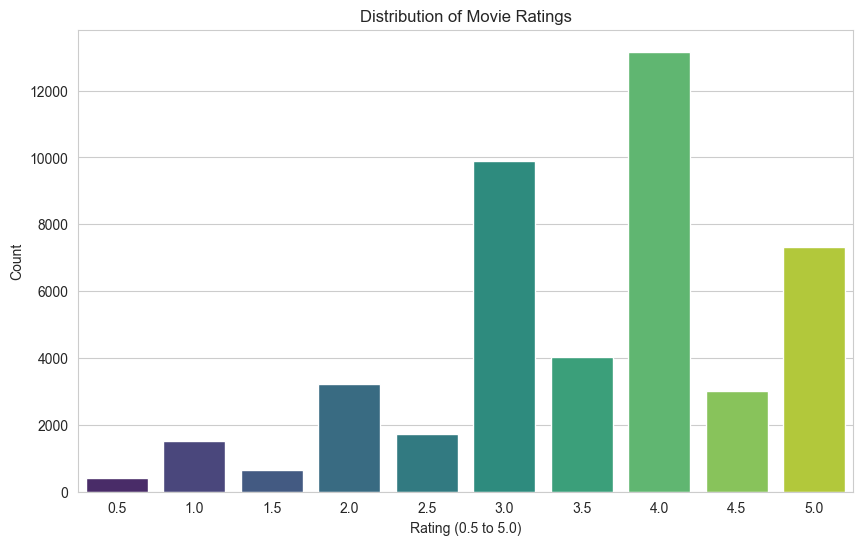

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=merged_df, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating (0.5 to 5.0)')
plt.ylabel('Count')
plt.show()

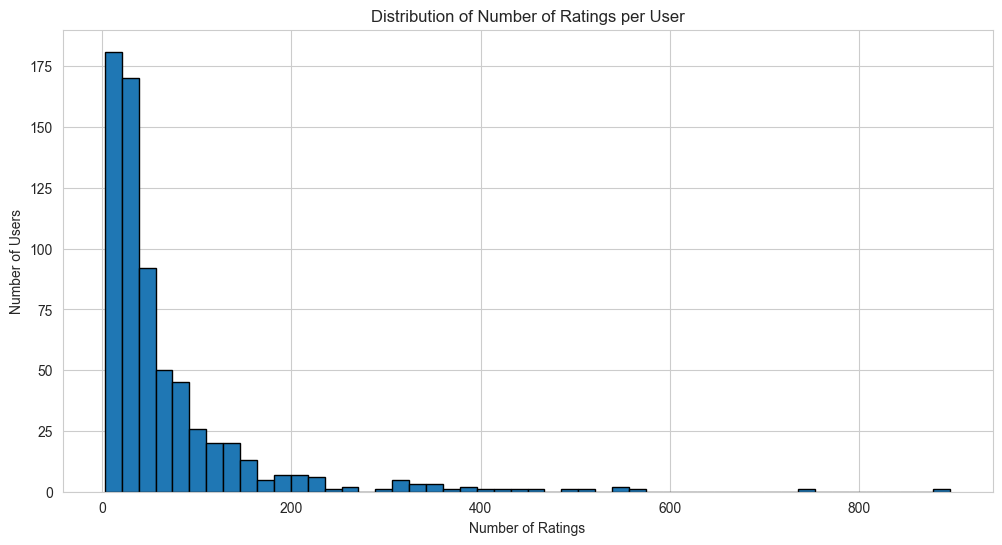

Minimum ratings per user: 3
Average ratings per user: 67.06
Maximum ratings per user: 896


In [ ]:
ratings_per_user = merged_df.groupby('userId')['rating'].count()

plt.figure(figsize=(12, 6))
ratings_per_user.hist(bins=50, edgecolor='black')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

print(f"Minimum ratings per user: {ratings_per_user.min()}")
print(f"Average ratings per user: {ratings_per_user.mean():.2f}")
print(f"Maximum ratings per user: {ratings_per_user.max()}")

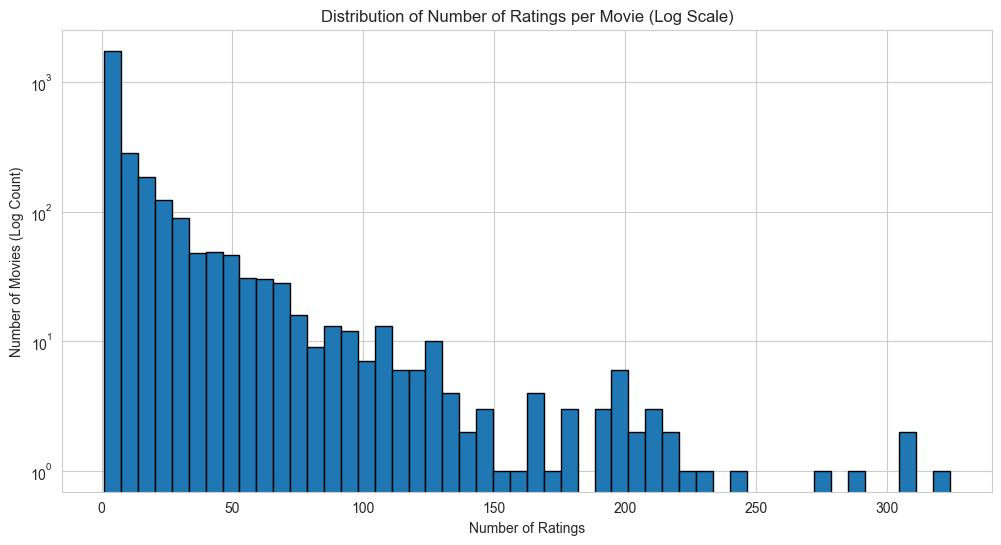


Top 10 Most Popular Movies (by Rating Count):
title
Terminator 3: Rise of the Machines    324
The Million Dollar Hotel              311
Solaris                               305
The 39 Steps                          291
Monsoon Wedding                       274
Once Were Warriors                    244
Three Colors: Red                     228
Men in Black II                       224
The Passion of Joan of Arc            218
Silent Hill                           215
Name: rating, dtype: int64

Total possible ratings (Users x Movies): 6083286
Sparsity: 0.9836 (Closer to 1 means more sparse)


In [ ]:
ratings_per_movie = merged_df.groupby('title')['rating'].count()

plt.figure(figsize=(12, 6))
ratings_per_movie.hist(bins=50, edgecolor='black', log=True) 
plt.title('Distribution of Number of Ratings per Movie (Log Scale)')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies (Log Count)')
plt.show()

# Find the top 10 most popular movies
top_10_movies = ratings_per_movie.nlargest(10)
print("\nTop 10 Most Popular Movies (by Rating Count):")
print(top_10_movies)

# Calculate sparsity
total_possible_ratings = ratings_df['userId'].nunique() * ratings_df['movieId'].nunique()
actual_ratings = len(ratings_df)
sparsity = 1 - (actual_ratings / total_possible_ratings)

print(f"\nTotal possible ratings (Users x Movies): {total_possible_ratings}")
print(f"Sparsity: {sparsity:.4f} (Closer to 1 means more sparse)")

C:\Users\shahi\AppData\Local\Temp\ipykernel_14644\3966866251.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Spectral')


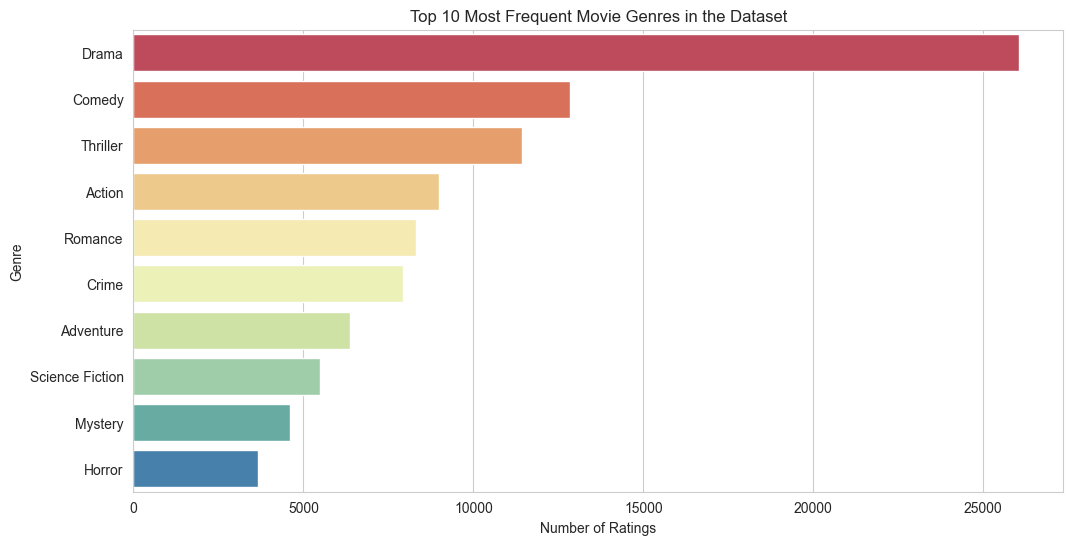

In [ ]:
def safe_extract_genres(genres_str):
    try:
        # Convert JSON string to list of dicts
        genres_list = eval(genres_str)
        return [g['name'] for g in genres_list]
    except:
        return []

all_genres = merged_df['genres'].apply(safe_extract_genres).explode()
genre_counts = all_genres.value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Spectral')
plt.title('Top 10 Most Frequent Movie Genres in the Dataset')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.show()